# Results

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mmcv import fileio
sns.set_theme(style="darkgrid", font_scale=1.4)

In [2]:
%cd CourseWork/

/home/drapeykonik/CourseWork


## OCR Training results

In [3]:
ocr_training_results = json.load(open("ocr_exps/second_exp_result.json"))
ocr_training_results.keys()

dict_keys(['Train losses', 'Valid losses', 'Train accuracies', 'Valid accuracies'])

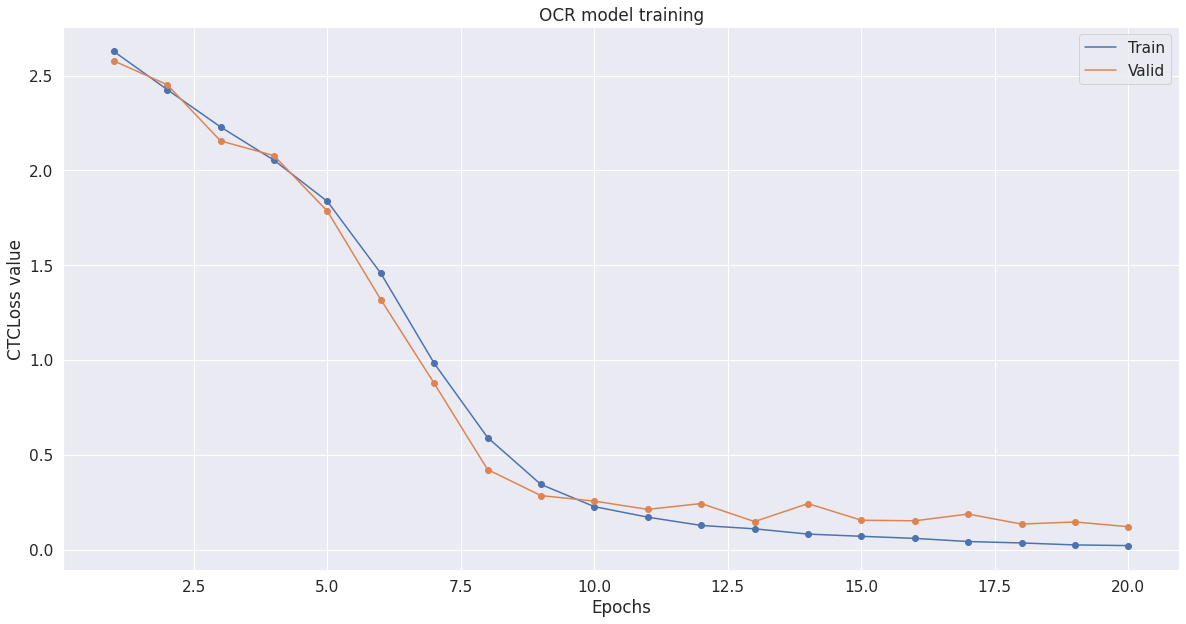

In [17]:
points = 20
fig = plt.figure(figsize=(20, 10))
plt.plot(range(1, points + 1), ocr_training_results["Train losses"][:points], label="Train")
plt.plot(range(1, points + 1), ocr_training_results["Valid losses"][:points], label="Valid")
plt.scatter(range(1, points + 1), ocr_training_results["Train losses"][:points])
plt.scatter(range(1, points + 1), ocr_training_results["Valid losses"][:points])
#axes = plt.axes()
#axes.set_xticks(range(1, points + 1))
#axes.set_yticks(np.linspace(0, 3, 20))
plt.xlabel("Epochs")
plt.ylabel("CTCLoss value")
plt.title("OCR model training")
plt.grid(visible=True)
plt.legend();

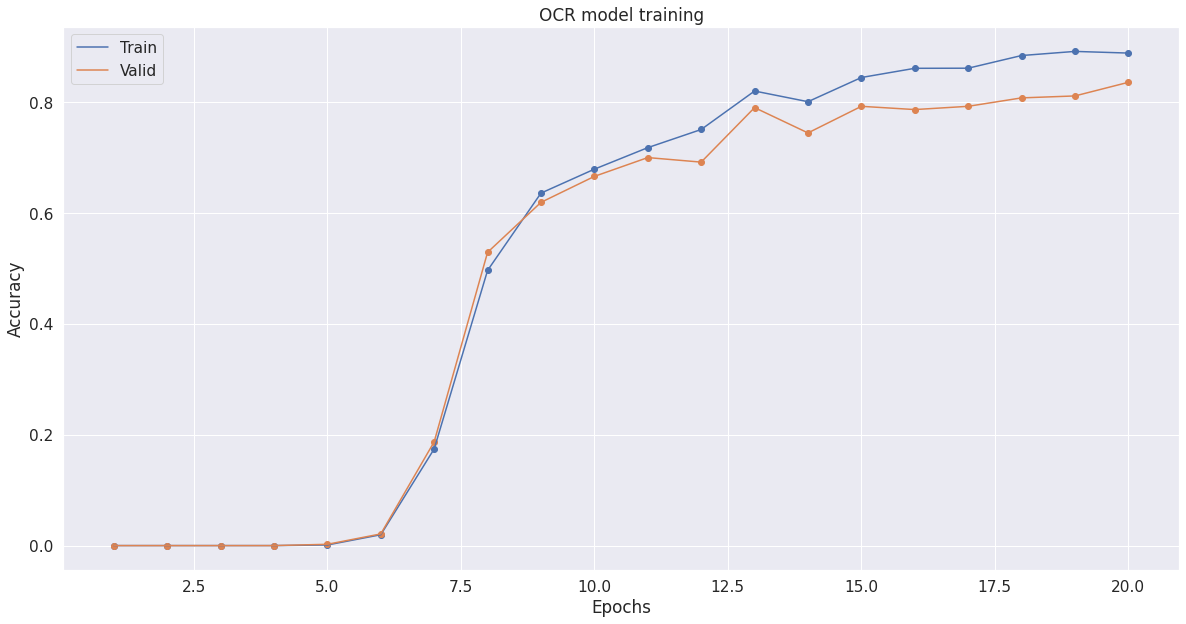

In [18]:
points = 20
plt.figure(figsize=(20, 10))
plt.plot(range(1, points + 1), ocr_training_results["Train accuracies"][:points], label="Train")
plt.plot(range(1, points + 1), ocr_training_results["Valid accuracies"][:points], label="Valid")
plt.scatter(range(1, points + 1), ocr_training_results["Train accuracies"][:points])
plt.scatter(range(1, points + 1), ocr_training_results["Valid accuracies"][:points])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("OCR model training")
plt.grid(visible=True)
plt.legend();

## Detection networks. Training results

### Faster R-CNN

In [19]:
faster_rcnn_training_results = fileio.list_from_file("faster_rcnn_exps/12epochs.log.json")
all_loss_rpn_cls_losses, loss_rpn_cls_epochs_losses = [], []
all_loss_rpn_bbox_losses, loss_rpn_bbox_epochs_losses = [], []
all_loss_cls_losses, loss_cls_epochs_losses = [], []
all_loss_bbox_losses, loss_bbox_epochs_losses = [], []
all_full_loss_losses, full_loss_epochs_losses = [], []
mAPs = []

jsons_by_epochs = [[json.loads(string) for string in faster_rcnn_training_results if json.loads(string)["epoch"] == epoch ] for epoch in range(1, 13)]
print(len(jsons_by_epochs), len(jsons_by_epochs[0]))

12 169


In [20]:
for jsons_by_epoch in jsons_by_epochs:
  epoch_rpn_cls_losses = []
  epoch_rpn_bbox_losses = []
  epoch_cls_losses = []
  epoch_bbox_losses = []
  epoch_full_losses = []
  for info in jsons_by_epoch:
    if info["mode"] == "train":
      epoch_rpn_cls_losses.append(info["loss_rpn_cls"])
      epoch_rpn_bbox_losses.append(info["loss_rpn_bbox"])
      epoch_cls_losses.append(info["loss_cls"])
      epoch_bbox_losses.append(info["loss_bbox"])
      epoch_full_losses.append(info["loss"])
    else:
      mAPs.append(info["bbox_mAP"])
  all_loss_rpn_cls_losses.extend(epoch_rpn_cls_losses)
  loss_rpn_cls_epochs_losses.append(np.array(epoch_rpn_cls_losses).mean())
  all_loss_rpn_bbox_losses.extend(epoch_rpn_bbox_losses)
  loss_rpn_bbox_epochs_losses.append(np.array(epoch_rpn_bbox_losses).mean())
  all_loss_cls_losses.extend(epoch_cls_losses)
  loss_cls_epochs_losses.append(np.array(epoch_cls_losses).mean())
  all_loss_bbox_losses.extend(epoch_bbox_losses)
  loss_bbox_epochs_losses.append(np.array(epoch_bbox_losses).mean())
  all_full_loss_losses.extend(epoch_full_losses)
  full_loss_epochs_losses.append(np.array(epoch_full_losses).mean())

In [21]:
print(len(all_loss_rpn_cls_losses), len(loss_rpn_cls_epochs_losses))
print(len(all_loss_rpn_bbox_losses), len(loss_rpn_bbox_epochs_losses))
print(len(all_loss_cls_losses), len(loss_cls_epochs_losses))
print(len(all_loss_bbox_losses),  len(loss_bbox_epochs_losses))
print(len(all_full_loss_losses), len(full_loss_epochs_losses))
print(len(mAPs))

2016 12
2016 12
2016 12
2016 12
2016 12
12


In [22]:
values_per_batch = len(all_loss_cls_losses) // len(loss_cls_epochs_losses)
values_per_batch

168

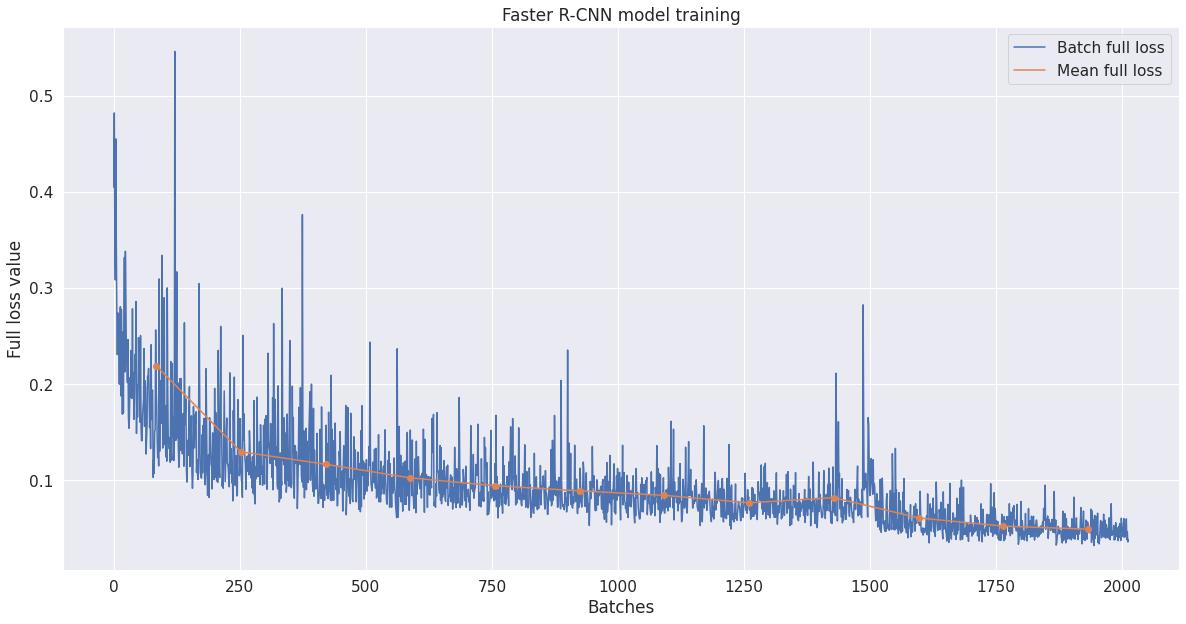

In [23]:
fig = plt.figure(figsize=(20, 10))
plt.plot(all_full_loss_losses[3:], label="Batch full loss")
plt.plot(range(values_per_batch // 2, len(all_loss_cls_losses) + 1, values_per_batch), full_loss_epochs_losses, label="Mean full loss")
#plt.plot(all_full_loss_losses[2:], label="Batch full loss")
plt.scatter(range(values_per_batch // 2, len(all_loss_cls_losses) + 1, values_per_batch), 
            full_loss_epochs_losses, color=sns.color_palette()[1], zorder=2)
#axes = plt.axes()
#axes.set_xticks(range(1, points + 1))
#axes.set_yticks(np.linspace(0, 3, 20))
plt.xlabel("Batches")
plt.ylabel("Full loss value")
plt.title("Faster R-CNN model training")
plt.grid(visible=True)
plt.legend();

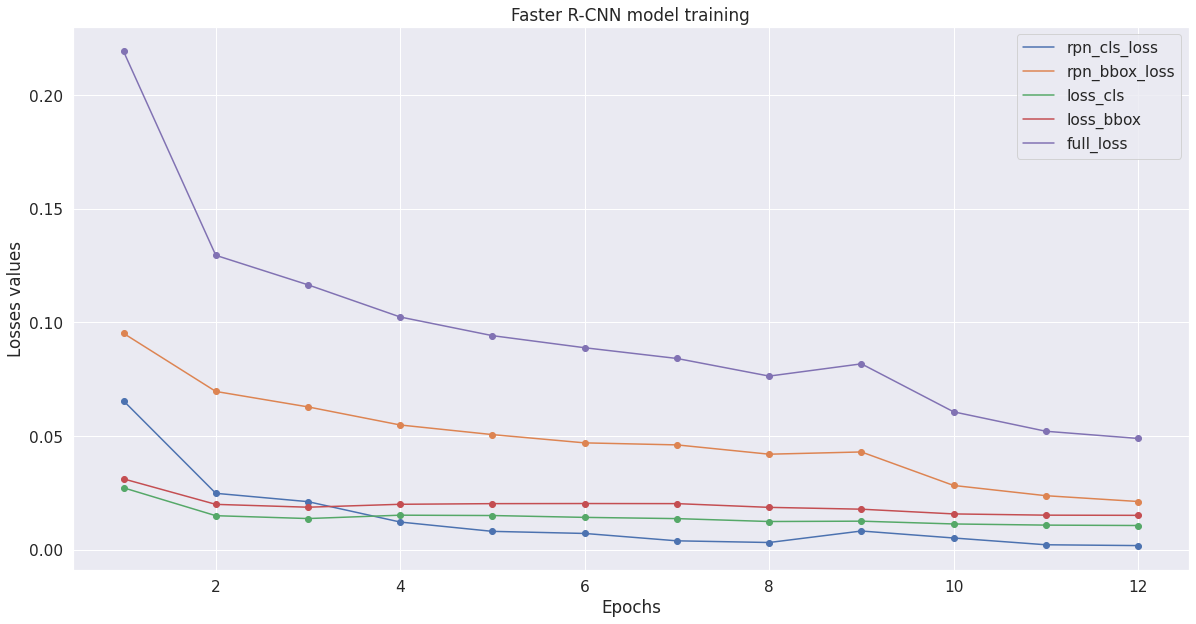

In [26]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(1, 13), loss_rpn_cls_epochs_losses, label="rpn_cls_loss")
plt.scatter(range(1, 13), loss_rpn_cls_epochs_losses)
plt.plot(range(1, 13), loss_rpn_bbox_epochs_losses, label="rpn_bbox_loss")
plt.scatter(range(1, 13), loss_rpn_bbox_epochs_losses)
plt.plot(range(1, 13), loss_cls_epochs_losses, label="loss_cls")
plt.scatter(range(1, 13), loss_cls_epochs_losses)
plt.plot(range(1, 13), loss_bbox_epochs_losses, label="loss_bbox")
plt.scatter(range(1, 13), loss_bbox_epochs_losses)
plt.plot(range(1, 13), full_loss_epochs_losses, label="full_loss")
plt.scatter(range(1, 13), full_loss_epochs_losses)
plt.xlabel("Epochs")
plt.ylabel("Losses values")
plt.title("Faster R-CNN model training")
plt.grid(visible=True)
plt.legend();

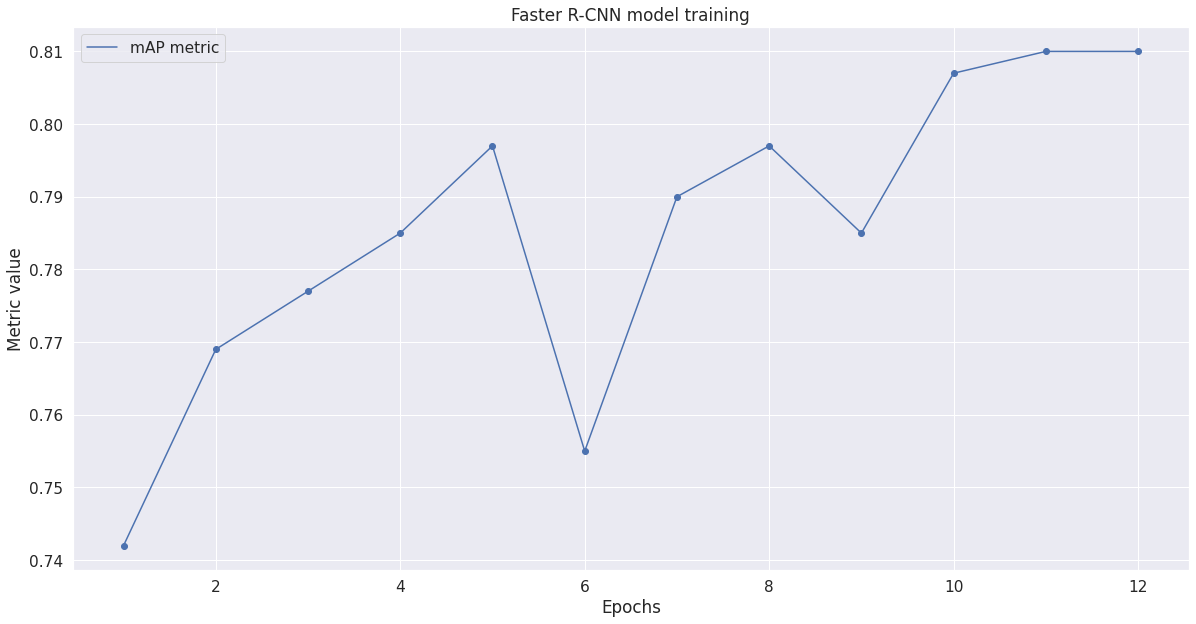

In [27]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(1, 13), mAPs, label="mAP metric")
plt.scatter(range(1, 13), mAPs)
plt.xlabel("Epochs")
plt.ylabel("Metric value")
plt.title("Faster R-CNN model training")
plt.grid(visible=True)
plt.legend();

### SSD

In [34]:
ssd_training_results = fileio.list_from_file("ssd_exps/None.log.json")
all_loss_cls_losses, loss_cls_epochs_losses = [], []
all_loss_bbox_losses, loss_bbox_epochs_losses = [], []
all_full_loss_losses, full_loss_epochs_losses = [], []
mAPs = []

jsons_by_epochs = [[json.loads(string) for string in ssd_training_results if json.loads(string)["epoch"] == epoch ] for epoch in range(1, 25)]
print(len(jsons_by_epochs), len(jsons_by_epochs[0]))

24 71


In [35]:
for jsons_by_epoch in jsons_by_epochs:
  epoch_cls_losses = []
  epoch_bbox_losses = []
  epoch_full_losses = []
  for info in jsons_by_epoch:
    if info["mode"] == "train":
      epoch_cls_losses.append(info["loss_cls"])
      epoch_bbox_losses.append(info["loss_bbox"])
      epoch_full_losses.append(info["loss"])
    else:
      mAPs.append(info["bbox_mAP"])
  all_loss_cls_losses.extend(epoch_cls_losses)
  loss_cls_epochs_losses.append(np.array(epoch_cls_losses).mean())
  all_loss_bbox_losses.extend(epoch_bbox_losses)
  loss_bbox_epochs_losses.append(np.array(epoch_bbox_losses).mean())
  all_full_loss_losses.extend(epoch_full_losses)
  full_loss_epochs_losses.append(np.array(epoch_full_losses).mean())

In [36]:
print(len(all_loss_cls_losses), len(loss_cls_epochs_losses))
print(len(all_loss_bbox_losses),  len(loss_bbox_epochs_losses))
print(len(all_full_loss_losses), len(full_loss_epochs_losses))
print(len(mAPs))

1680 24
1680 24
1680 24
24


In [37]:
values_per_batch = len(all_loss_cls_losses) // len(loss_cls_epochs_losses)
values_per_batch

70

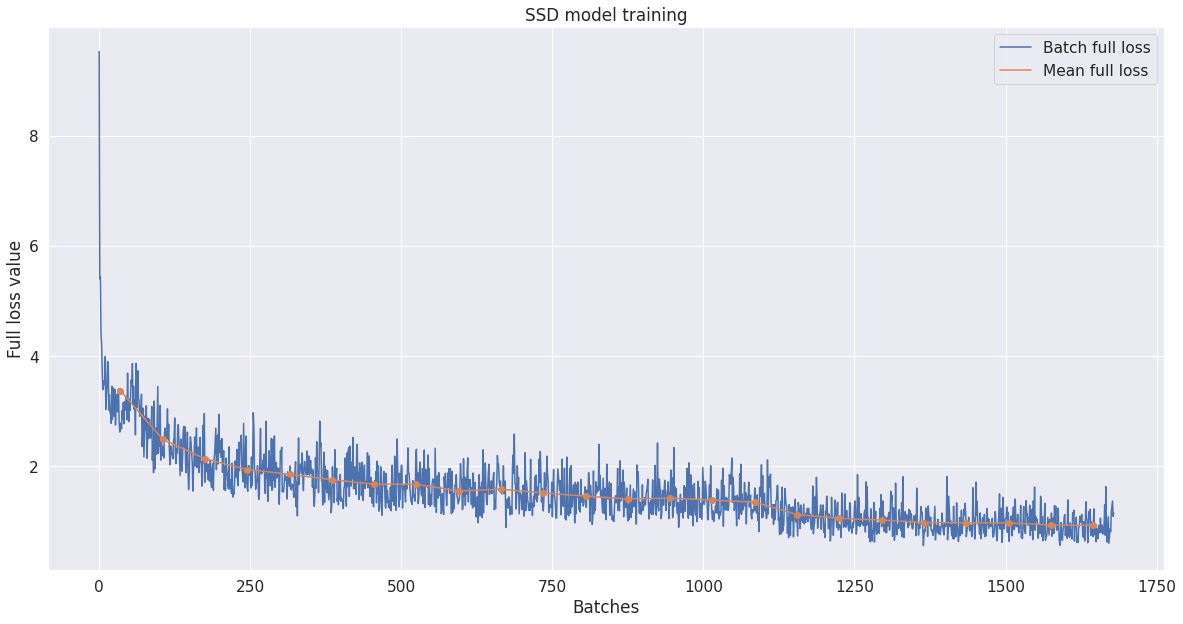

In [40]:
fig = plt.figure(figsize=(20, 10))
plt.plot(all_full_loss_losses, label="Batch full loss")
plt.plot(range(values_per_batch // 2, len(all_loss_cls_losses) + 1, values_per_batch), full_loss_epochs_losses, label="Mean full loss")
plt.scatter(range(values_per_batch // 2, len(all_loss_cls_losses) + 1, values_per_batch), 
            full_loss_epochs_losses, color=sns.color_palette()[1], zorder=2)
plt.xlabel("Batches")
plt.ylabel("Full loss value")
plt.title("SSD model training")
plt.grid(visible=True)
plt.legend();

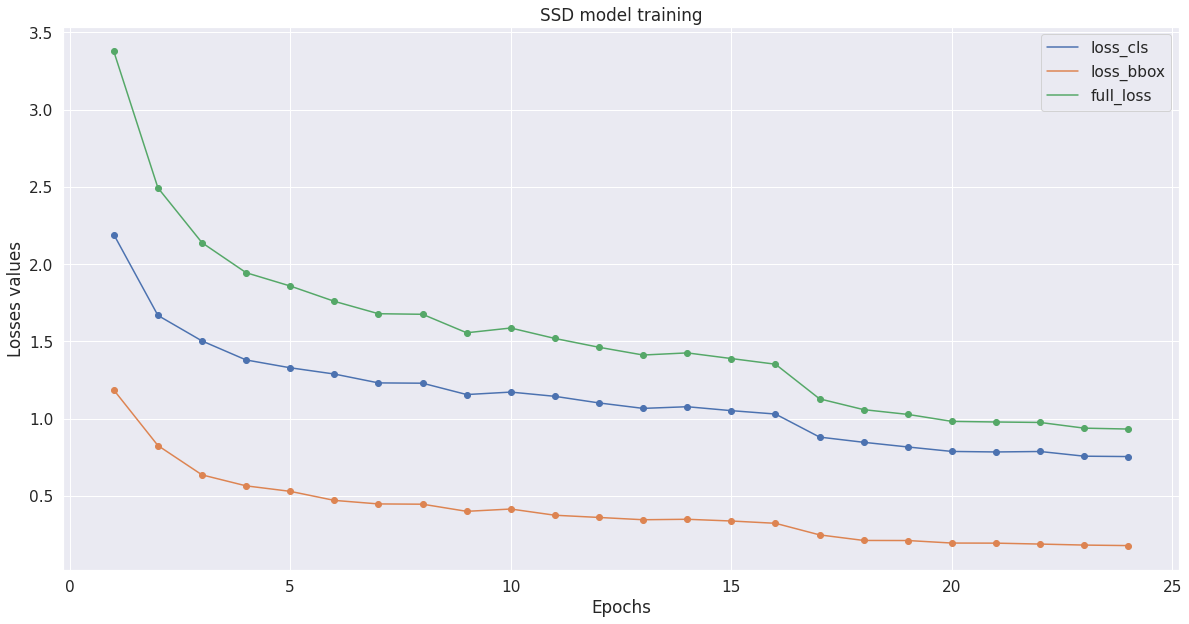

In [43]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(1, 25), loss_cls_epochs_losses, label="loss_cls")
plt.scatter(range(1, 25), loss_cls_epochs_losses)
plt.plot(range(1, 25), loss_bbox_epochs_losses, label="loss_bbox")
plt.scatter(range(1, 25), loss_bbox_epochs_losses)
plt.plot(range(1, 25), full_loss_epochs_losses, label="full_loss")
plt.scatter(range(1, 25), full_loss_epochs_losses)
plt.xlabel("Epochs")
plt.ylabel("Losses values")
plt.title("SSD model training")
plt.grid(visible=True)
plt.legend();

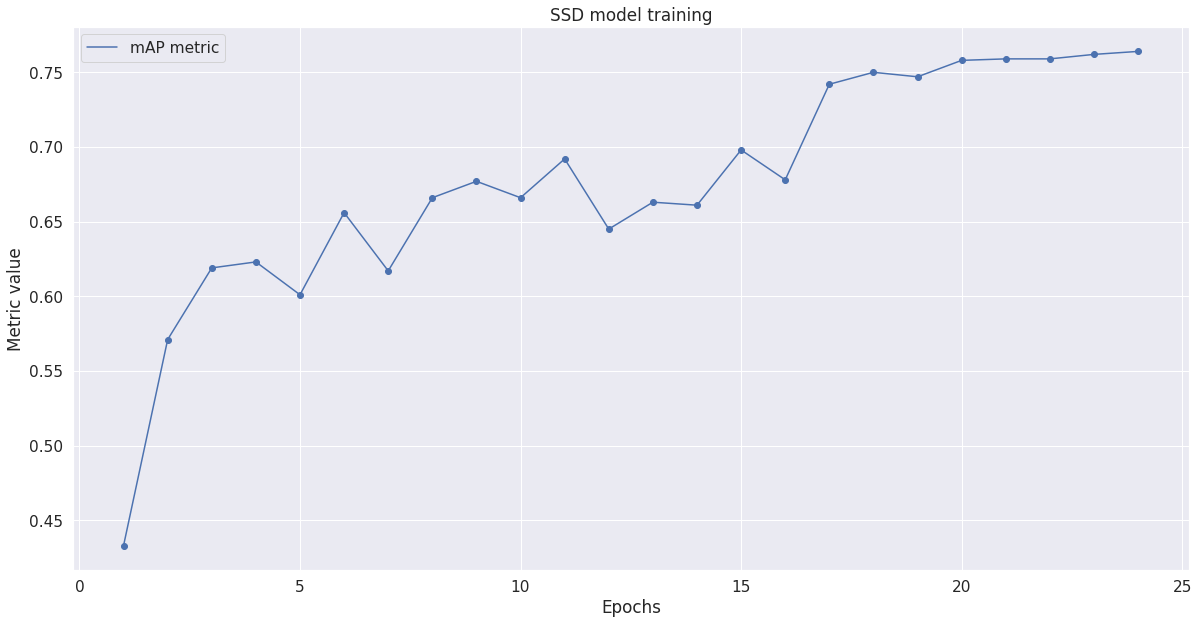

In [44]:
fig = plt.figure(figsize=(20, 10))
plt.plot(range(1, 25), mAPs, label="mAP metric")
plt.scatter(range(1, 25), mAPs)
plt.xlabel("Epochs")
plt.ylabel("Metric value")
plt.title("SSD model training")
plt.grid(visible=True)
plt.legend();